In [1]:
import sys
import os
project_path = os.path.abspath('../..')
if project_path not in sys.path:
    sys.path.append(project_path)

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos procesados
df = pd.read_csv('../../data/processed/walmart_sales_processed.csv')
df['Date'] = pd.to_datetime(df['Date'])

print("Datos cargados correctamente")
df.head()

Datos cargados correctamente


,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand,Date,Year,Month,Week,Is_Holiday_Week
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,False,Friday,True,172,179,2024-03-31 21:46:00,2024,3,13,0
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,False,Monday,True,109,484,2024-07-28 12:45:00,2024,7,30,0
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,False,Tuesday,True,289,416,2024-06-10 04:55:00,2024,6,24,0
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,True,Sunday,False,174,446,2024-08-15 01:03:00,2024,8,33,0
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,False,Thursday,True,287,469,2024-09-13 00:45:00,2024,9,37,0


In [2]:
# Calcular ventas diarias totales (revenue)
df['revenue'] = df['quantity_sold'] * df['unit_price']

# Agrupar por fecha
daily_sales = df.groupby('Date')['revenue'].sum().reset_index()
daily_sales = daily_sales.sort_values('Date')

print("Ventas diarias totales calculadas")
daily_sales.head(10)

Ventas diarias totales calculadas


,Date,revenue
0,2024-01-01 00:31:00,7989.45
1,2024-01-01 00:40:00,7114.00
2,2024-01-01 00:54:00,1072.17
3,2024-01-01 02:04:00,8356.85
4,2024-01-01 02:59:00,6379.95
5,2024-01-01 03:00:00,3551.70
6,2024-01-01 04:05:00,3584.58
7,2024-01-01 05:55:00,3741.18
8,2024-01-01 07:52:00,4339.60
9,2024-01-01 08:37:00,744.12


In [3]:
# Ejecuta esta celda solo una vez
!pip install prophet

  Using cached holidays-0.87-py3-none-any.whl.metadata (50 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ----------- ---------------------------- 3.4/12.1 MB 22.3 MB/s eta 0:00:01
   ------------------------------ --------- 9.2/12.1 MB 30.4 MB/s eta 0:00:01
   ------------------------------- -------- 9.4/12.1 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------  12.1/12.1 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 14.2 MB/s  0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 14.9 MB/s  0:00:00

   ---------------------------------------- 0/6 [tqdm]
   ------ --------------------------------- 1/6 [stanio]
   ------------- -------------------------- 2/6 [importlib_resources]
   -------------------- ------------------- 3/6 [holidays]
   -------------------- --------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\BIBLIOTECA 2\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:21:36 - cmdstanpy - INFO - Chain [1] start processing
15:21:37 - cmdstanpy - INFO - Chain [1] done processing


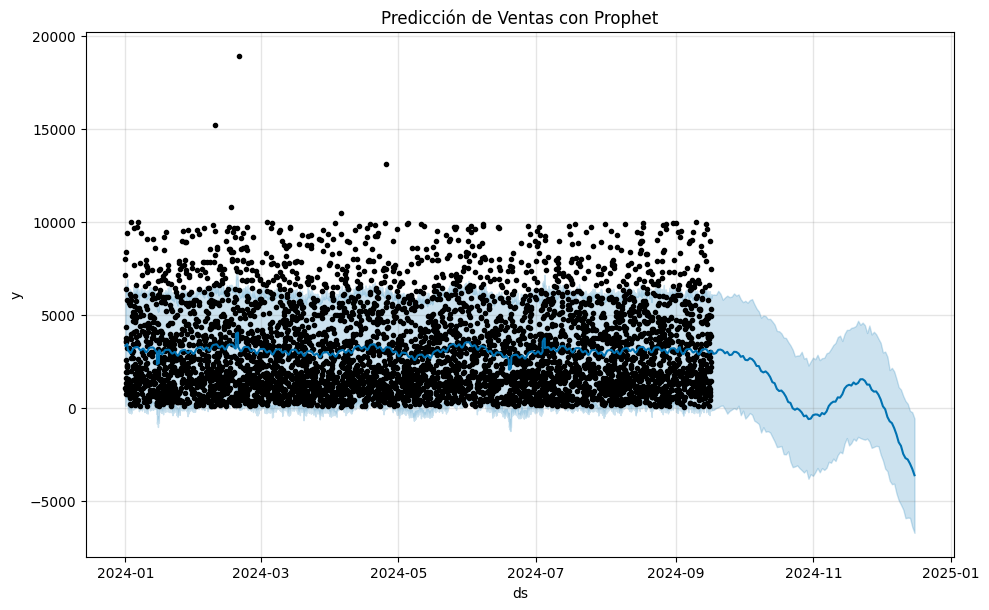

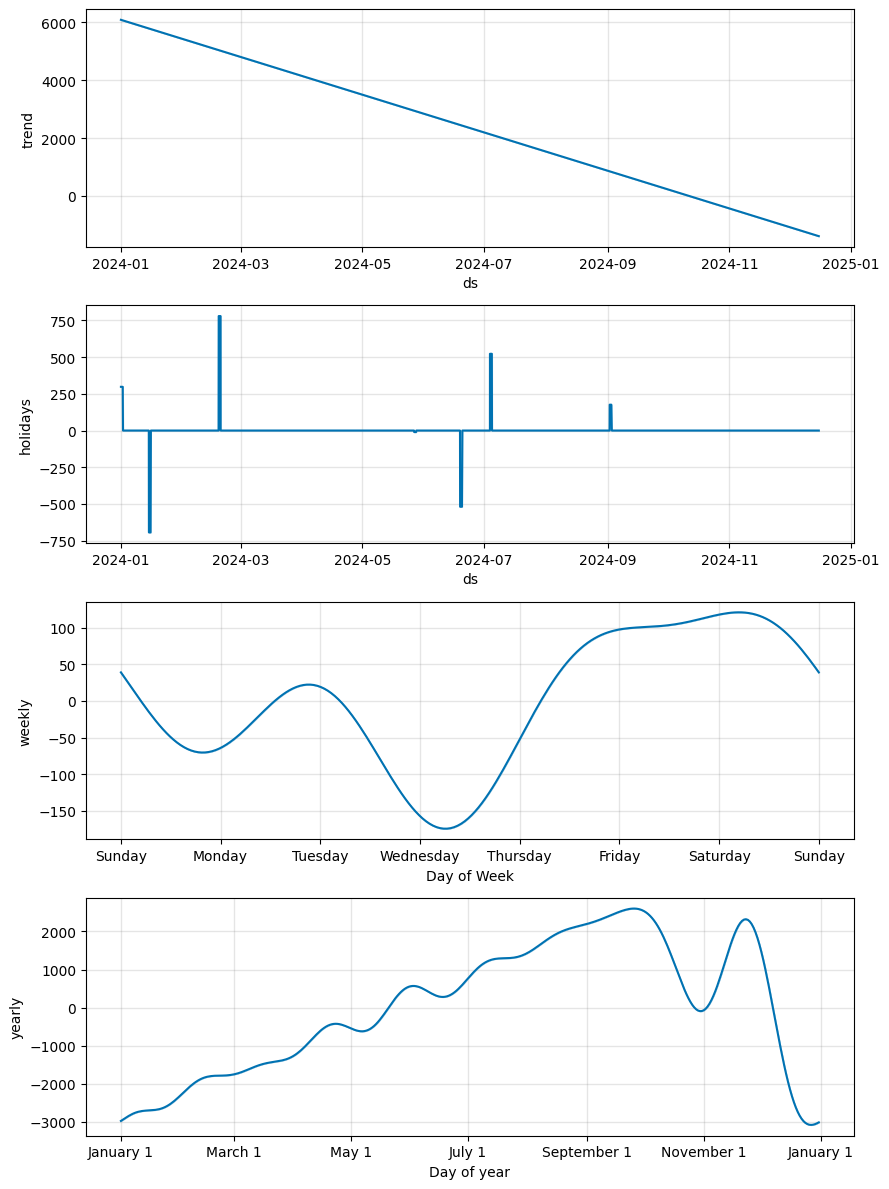

In [4]:
from prophet import Prophet

# Preparar datos para Prophet
prophet_df = daily_sales.rename(columns={'Date': 'ds', 'revenue': 'y'})

# Crear y entrenar modelo
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.add_country_holidays(country_name='US')
m.fit(prophet_df)

# Predecir próximos 90 días
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

# Graficar
fig1 = m.plot(forecast)
plt.title("Predicción de Ventas con Prophet")
plt.show()

fig2 = m.plot_components(forecast)
plt.show()